# Mental_Fitness_Tracker

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder

##### Step 1: Load the Dataset

In [2]:
file_path = 'dataset.csv'
df = pd.read_csv(file_path)

##### EDA: Exploratory Data Analysis

In [3]:
# Display basic information about the dataset
print("Basic Information:")
print(df.info())

# Display summary statistics
print("\nSummary Statistics:")
print(df.describe())

# Display missing values
print("\nMissing Values:")
print(df.isnull().sum())

# Define the target column
target_column = 'DALYs (Disability-Adjusted Life Years) - Mental disorders - Sex: Both - Age: All Ages (Percent)'

Basic Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6840 entries, 0 to 6839
Data columns (total 11 columns):
 #   Column                                                                                           Non-Null Count  Dtype  
---  ------                                                                                           --------------  -----  
 0   Entity                                                                                           6840 non-null   object 
 1   Code                                                                                             6150 non-null   object 
 2   Year                                                                                             6840 non-null   int64  
 3   Prevalence - Schizophrenia - Sex: Both - Age: Age-standardized (Percent)                         6840 non-null   float64
 4   Prevalence - Bipolar disorder - Sex: Both - Age: Age-standardized (Percent)                      6840 non-null   

##### Step 2: Preprocess the Data

In [4]:
# Drop non-numeric columns
df_numeric = df.select_dtypes(include=['float64', 'int64'])

# Drop rows with NaN values
df_numeric = df_numeric.dropna()

# Split features and target variable
X = df_numeric.drop([target_column], axis=1)
y = df_numeric[target_column]

##### Step 3: Encode Categorical Variables

In [5]:
# Get non-numeric columns
non_numeric_cols = list(set(df.columns) - set(df_numeric.columns))

# One-hot encode non-numeric columns
encoder = OneHotEncoder(drop='first', sparse=False)
encoded_cols = encoder.fit_transform(df[non_numeric_cols])

# Concatenate encoded columns with numeric columns
X_encoded = np.concatenate([X.values, encoded_cols], axis=1)

C:\Users\NEW\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


##### Step 4: Split the Data

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

##### Step 5: Train a Linear Regression Model

##### Step 6: Evaluate the Model

In [8]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred_train = model.predict(X_train)
mse_train = mean_squared_error(y_train, y_pred_train)
r2_train = r2_score(y_train, y_pred_train)

print("Training Results:")
print(f"Mean Squared Error (Train): {mse_train}")
print(f"R-squared (Train): {r2_train}")

y_pred_test = model.predict(X_test)
mse_test = mean_squared_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)

print("\nTesting Results:")
print(f"Mean Squared Error (Test): {mse_test}")
print(f"R-squared (Test): {r2_test}")

Training Results:
Mean Squared Error (Train): 0.20812658742924156
R-squared (Train): 0.9607644025441985

Testing Results:
Mean Squared Error (Test): 0.23114646160062152
R-squared (Test): 0.954558325265399


##### Step 7: Visualize the Results

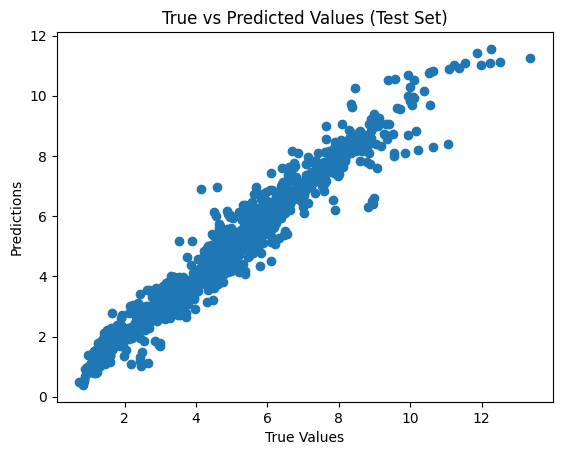

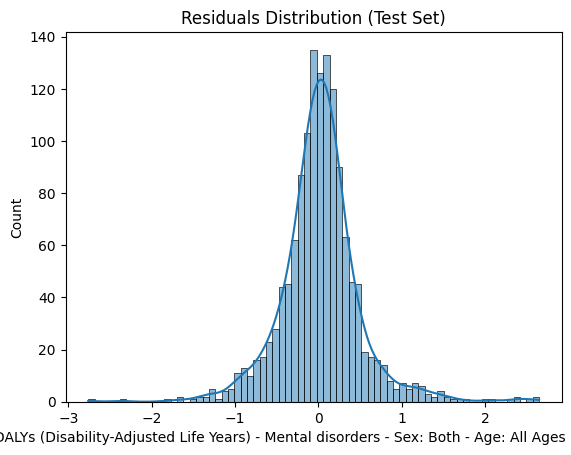

In [9]:
# Scatter plot of true vs predicted values
plt.scatter(y_test, y_pred_test)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('True vs Predicted Values (Test Set)')
plt.show()

# Residual plot
residuals = y_test - y_pred_test
sns.histplot(residuals, kde=True)
plt.title('Residuals Distribution (Test Set)')
plt.show()